# Lab 9-23-21
## Review of Built-in Structures

In [4]:
# Nested lists exercises 
# data
teams = [["Ben", "Bob", "Mike"], ["Ann", "Sue"], ["Ron", "Sarah", "Edwin"]]

#To access lists we use indices,
# To access an element of a lists within a list use consecutive []
# 1. print first team 
print('1. ',teams[0])

# 2. print Sarah
print('2. ',teams[2][1])

1.  ['Ben', 'Bob', 'Mike']
2.  Sarah


In [5]:
#3. Assume that first names are team leaders, print team leaders along with the team numbers 
print('3. List of team leaders')
tnum = 1
for team in teams: 
    print('leader of team #', tnum, 'is: ', team[0])
    tnum += 1
    
#4. Add a new team to the list ["Sean", "John", "Felix"]   
teams.append(['Sean', "John", 'Felix'])
print('4. ', teams)

3. List of team leaders
leader of team # 1 is:  Ben
leader of team # 2 is:  Ann
leader of team # 3 is:  Ron
4.  [['Ben', 'Bob', 'Mike'], ['Ann', 'Sue'], ['Ron', 'Sarah', 'Edwin'], ['Sean', 'John', 'Felix']]


In [57]:
#Nested Dict Exercises 
#Data
employee1 = {"name": {"first": "Jane", "last": "Jackson"}, 
            "address": {"country":"USA", "city":"Denver"},
            "age": 57,
            "salary": "75,0000"}
# To access dictionary values, we use keys instead of indices 
# To access embedded values, we use consecutive keys
# 1. print the age of the employee
print('1. The age of the employee is: ', employee1['age'])

# 2. print the last name and city of the employee
print('2. ', employee1['name']['last'],'lives in' ,employee1['address']['city'])


1. The age of the employee is:  57
2.  Jackson lives in Denver


In [58]:
#List of distionaries
#Data
employee2 = {"name": {"first": "Paul", "last": "Carter"},
             "address": {"country": "USA", "city": "Chicago"},
             "age": 55,
             "salary": "85,0000"}
#1. Combine both employees in a list and print it 
employees = []
employees.append(employee1)
employees.append(employee2)
print(employees)

[{'name': {'first': 'Jane', 'last': 'Jackson'}, 'address': {'country': 'USA', 'city': 'Denver'}, 'age': 57, 'salary': '75,0000'}, {'name': {'first': 'Paul', 'last': 'Carter'}, 'address': {'country': 'USA', 'city': 'Chicago'}, 'age': 55, 'salary': '85,0000'}]


In [59]:
#2. Access and print the salary of the second employee in the build-in data structure 
print('2. Salary of the second employee is: ', employees[1]['salary'])


2. Salary of the second employee is:  85,0000


In [61]:
#3. Calculate the average salary of all employees
tsal = 0 
for e in range(len(employees)):
    sal = employees[e]['salary']
    sal = sal.replace(',','') # strip the comma and replace with nothing because we need to calculate 
    tsal += int(sal)
avg_sal = tsal/len(employees)

print('The average salary is: ', avg_sal)

The average salary is:  800000.0


In [54]:
lnames = ['Ben', 'Bob', 'Mike']
for e in range(len(lnames)):
    print(e)
range(len(employees))
len(employees)

0
1
2


2

## Scraping iMDB table
### Single table page with simple tags 
    - IMDB Top Chart: http://www.imdb.com/chart/top
    - Goal: fetch the movie titles and ratings and compute average ratings
### Multipe table page with custom structure 
    - Library of congress US presidents list: https://www.loc.gov/rr/print/list/057_chron.html
    - Goal: Fetch US presidents' names

In [70]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/chart/top'
r = requests.get(url)
soup = BeautifulSoup(r.text)

print(soup.title)
mo_table = soup.find('table') 
# html code that has the table in it: <table class="chart full-width" data-caller-name="chart-top250movie">
print(mo_table)


<title>IMDb Top 250 - IMDb</title>
<table class="chart full-width" data-caller-name="chart-top250movie">
<colgroup>
<col class="chartTableColumnPoster"/>
<col class="chartTableColumnTitle"/>
<col class="chartTableColumnIMDbRating"/>
<col class="chartTableColumnYourRating"/>
<col class="chartTableColumnWatchlistRibbon"/>
</colgroup>
<thead>
<tr>
<th></th>
<th>Rank &amp; Title</th>
<th>IMDb Rating</th>
<th>Your Rating</th>
<th></th>
</tr>
</thead>
<tbody class="lister-list">
<tr>
<td class="posterColumn">
<span data-value="1" name="rk"></span>
<span data-value="9.220480499369204" name="ir"></span>
<span data-value="7.791552E11" name="us"></span>
<span data-value="2463474" name="nv"></span>
<span data-value="-1.779519500630796" name="ur"></span>
<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>
</a> 

In [82]:
mo_table.find('tr')

<tr>
<th></th>
<th>Rank &amp; Title</th>
<th>IMDb Rating</th>
<th>Your Rating</th>
<th></th>
</tr>

In [83]:
mo_table.find('tr').find_all('th')

[<th></th>,
 <th>Rank &amp; Title</th>,
 <th>IMDb Rating</th>,
 <th>Your Rating</th>,
 <th></th>]

In [ ]:
#Empty list to grab the headers 
headers = []
row = mo_table.find_all('tr')
for header in mo_table.find('tr').find_all('th'):
    headers.append(header.text)

In [73]:
# movies 
movies = []

# rows has all the rows withtin tbody with tr tag
rows = mo_table.find('tbody').find_all('tr')

# For each row, fetch the values and store them in a list called values 
for row in rows:
    values = [] # Temporarily store values from the rows 
    for col in row.find_all('td'):
        values.append(col.text)
    if values: # not empty
        mo_dict = {} # empty dictionary to transfer row values 
        for i in range(len(values)):
                mo_dict[headers[i]] = values[i]
    movies.append(mo_dict)
print('The total number of movies in the table is: ', len(movies))

NameError: name 'headers' is not defined

In [74]:
# calculate total ratings 
# trt is total ratings nad used to accumulate ratings
trt = 0
for movie in movies:
    rt = movie['IMDb rating'].replace('\n','')
    trt += float(rt)
rt_avg = trt/len(movies)

ZeroDivisionError: division by zero

### Scraping and Visualizing IMDB ratings
    - Game of Thrones: http://www.imdb.com/title/tt0944947/episodes
    - Note that IMDB’s overview is spread out across multiple pages(per season or per year), so we iterate over the seasons we want to retrieve using an extra loop

In [111]:
import requests 
from bs4 import BeautifulSoup
url = 'http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []

In [130]:
obj1 = enumerate(listing.find('div', recursive = False))
print(type(obj1))
print(list(enumerate(listing.find('div', recursive = False))))

<class 'enumerate'>
[(0, '\n'), (1, <div class="image">
<a href="/title/tt5654088/" itemprop="url" title="Dragonstone"> <div class="hover-over-image zero-z-index" data-const="tt5654088">
<img alt="Dragonstone" class="zero-z-index" height="126" src="https://m.media-amazon.com/images/M/MV5BMmM3OWJmMDQtYjAxNC00MjlhLThjYWMtNGM3ZmUxMDZjZWUyXkEyXkFqcGdeQXVyNTM3MDMyMDQ@._V1_UX224_CR0,0,224,126_AL_.jpg" width="224"/>
<div>S7, Ep1</div>
</div>
</a> </div>), (2, '\n'), (3, <div class="info" itemprop="episodes" itemscope="" itemtype="http://schema.org/TVEpisode">
<meta content="1" itemprop="episodeNumber"/>
<div class="airdate">
            16 Jul. 2017
    </div>
<strong><a href="/title/tt5654088/" itemprop="name" title="Dragonstone">Dragonstone</a></strong>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path 

In [112]:
# Go over seasons 1 to 7 
for season in range (1,8):
    r = requests.get(url, params = {'season':season})
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    for epnr, div in enumerate(listing.find_all('div', recursive = False)):
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_= 'ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode,'--rating:', rating)
        episodes.append(episode)
        ratings.append(rating)

Episode: 1.1 --rating: 9.1
Episode: 1.2 --rating: 8.8
Episode: 1.3 --rating: 8.7
Episode: 1.4 --rating: 8.8
Episode: 1.5 --rating: 9.1
Episode: 1.6 --rating: 9.2
Episode: 1.7 --rating: 9.2
Episode: 1.8 --rating: 9.0
Episode: 1.9 --rating: 9.6
Episode: 1.10 --rating: 9.5
Episode: 2.1 --rating: 8.8
Episode: 2.2 --rating: 8.5
Episode: 2.3 --rating: 8.8
Episode: 2.4 --rating: 8.8
Episode: 2.5 --rating: 8.8
Episode: 2.6 --rating: 9.1
Episode: 2.7 --rating: 8.9
Episode: 2.8 --rating: 8.8
Episode: 2.9 --rating: 9.7
Episode: 2.10 --rating: 9.4
Episode: 3.1 --rating: 8.8
Episode: 3.2 --rating: 8.6
Episode: 3.3 --rating: 8.9
Episode: 3.4 --rating: 9.6
Episode: 3.5 --rating: 9.0
Episode: 3.6 --rating: 8.8
Episode: 3.7 --rating: 8.7
Episode: 3.8 --rating: 9.0
Episode: 3.9 --rating: 9.9
Episode: 3.10 --rating: 9.2
Episode: 4.1 --rating: 9.1
Episode: 4.2 --rating: 9.7
Episode: 4.3 --rating: 8.9
Episode: 4.4 --rating: 8.8
Episode: 4.5 --rating: 8.8
Episode: 4.6 --rating: 9.7
Episode: 4.7 --rating: 9.

In [117]:
print(episodes)

['S1', '', '', '', '', '', '', '', '', '', 'S2', '', '', '', '', '', '', '', '', '', 'S3', '', '', '', '', '', '', '', '', '', 'S4', '', '', '', '', '', '', '', '', '', 'S5', '', '', '', '', '', '', '', '', '', 'S6', '', '', '', '', '', '', '', '', '', 'S7', '', '', '', '', '', '']


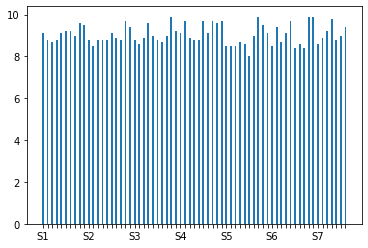

In [115]:
import matplotlib.pyplot as plt
episodes = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' 
            for e in episodes]
plt.figure()
positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align = 'center')
plt.xticks(positions, episodes)
plt.show()